In [1]:
import sys
import os
from matplotlib import pyplot as plt

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [2]:
dataset_100yr = TSD(file_path='../datasets/100_yr_dataset.xlsx')
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')

Dataset loaded from ../datasets/100_yr_dataset.xlsx
Dataset loaded from ../datasets/power_transitions.xlsx


In [21]:
# print(dataset_100yr.scv.PolityName.value_counts().head(20))
# print(dataset_PT.scv_imputed.PolityName.value_counts().head(20))
dataset_PT.scv_imputed

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money,Crisis,PCA_1,PCA_2
0,Middle Yellow River Valley,1,cn_qing_dyn_1,1652.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
1,Middle Yellow River Valley,1,cn_qing_dyn_1,1691.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
2,Middle Yellow River Valley,1,cn_qing_dyn_1,1728.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.0,-3.120575,0.891890
3,Middle Yellow River Valley,1,cn_qing_dyn_1,1765.5,8.066122,7.117271,5.824925,6.75000,0.727273,0.916667,0.8,6.0,0.2,-3.120575,0.891890
4,Middle Yellow River Valley,2,cn_qing_dyn_2,1808.0,8.469822,7.053078,5.949825,6.29981,0.909091,1.000000,0.8,6.0,0.0,-3.687457,0.452466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,NaN,797,de_empire_1,1013.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2054,NaN,797,de_empire_1,1031.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,0.0,-0.636203,-0.236214
2055,NaN,797,de_empire_1,1047.5,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,2.0,-0.636203,-0.236214
2056,NaN,797,de_empire_1,1081.0,7.332438,6.000000,5.143265,5.50000,0.727273,0.583333,0.8,3.0,3.0,-0.636203,-0.236214


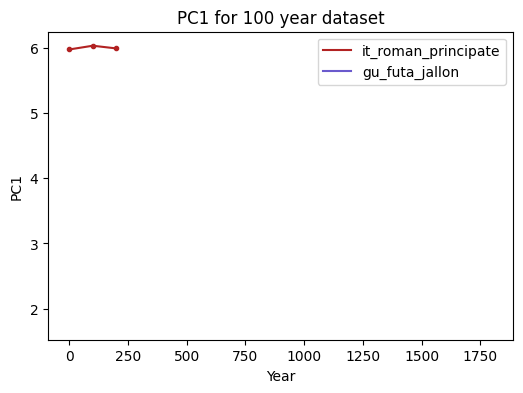

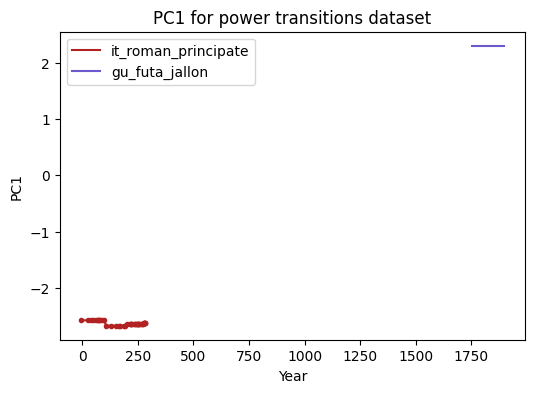

In [23]:
pols = ['it_roman_principate','gu_futa_jallon']
colors  = ['firebrick', 'slateblue']

fig, ax = plt.subplots(figsize=(6, 4))
for pol in pols:
    color = colors[pols.index(pol)]
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.PolityName == pol].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.PolityName == pol].sort_values(by='Year')['PC_1'], label = pol, color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.PolityName == pol].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.PolityName == pol].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for 100 year dataset')
# plt.xlim(-6000,2000)
plt.show()


fig, ax = plt.subplots(figsize=(6, 4))
for pol in pols:
    color = colors[pols.index(pol)]
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.PolityName == pol].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.PolityName == pol].sort_values(by='Year')['PCA_1'], label = pol, color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.PolityName == pol].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.PolityName == pol].sort_values(by='Year')['PCA_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for power transitions dataset')

plt.show()

In [ ]:
import pandas as pd
import pyreadr
from utils import download_data
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")
polity_df = download_data("https://seshatdata.com/api/core/polities/?page_size=100")

Downloaded 839 rows


In [ ]:
dataset_100yr.scv.columns

Index(['NGA', 'PolityID', 'PolityName', 'Year', 'Pop', 'Terr', 'Cap',
       'Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money'],
      dtype='object')

In [ ]:
R_data = data['raw.cc.mean']
R_data.columns

Index(['PolID.OldSystem', 'PolityID', 'NGA.Time', 'NGA', 'Dupl', 'Metal',
       'Project', 'Weapon', 'Armor', 'OtherAnimal', 'Animal', 'Defense',
       'MilTech', 'Iron', 'Cavalry', 'IronCav', 'Pop', 'Terr', 'Cap', 'Hier',
       'Gov', 'Infra', 'Info', 'Money', 'MSP', 'EgalID', 'Prosoc', 'Constrain',
       'NoGodRule'],
      dtype='object')

In [ ]:
polity_df.columns

Index(['id', 'name', 'start_year', 'end_year', 'long_name', 'new_name',
       'polity_tag', 'general_description', 'shapefile_name',
       'private_comment', 'created_date', 'modified_date', 'home_nga_id',
       'home_nga_name', 'home_nga_subregion', 'home_nga_longitude',
       'home_nga_latitude', 'home_nga_capital_city', 'home_nga_nga_code',
       'home_nga_fao_country', 'home_nga_world_region',
       'home_seshat_region_id', 'home_seshat_region_name',
       'home_seshat_region_subregions_list',
       'home_seshat_region_mac_region_id',
       'home_seshat_region_mac_region_name', 'private_comment_n_id',
       'private_comment_n_text', 'home_nga', 'private_comment_n'],
      dtype='object')

In [ ]:
R_data['NGA'] = R_data.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

In [ ]:

R_data = R_data.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

In [ ]:
dataset = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
dataset.initialize_dataset_grid(-10000,2000,100)


Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv
Downloaded 839 rows


In [ ]:
dataset.scv = R_data[all_cols]

In [ ]:
dataset.impute_missing_values()

In [ ]:
dataset.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 78.91%
PC2: 5.14%
PC3: 4.67%
PC4: 3.66%
PC5: 3.32%
PC6: 1.68%
PC7: 1.54%
PC8: 1.08%


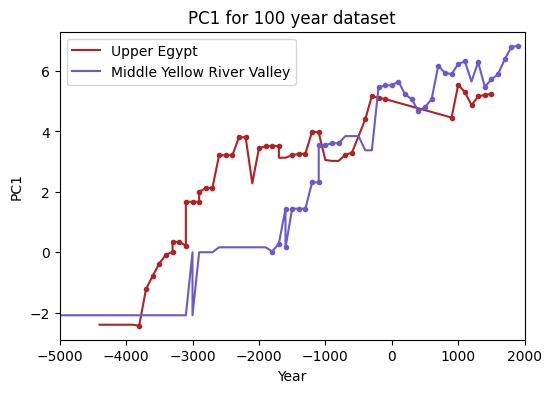

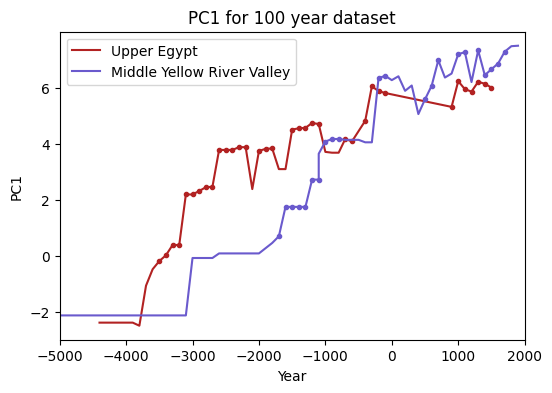

In [ ]:
ngas = ['Upper Egypt','Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')['PC_1'], label = nga, color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for 100 year dataset')
plt.xlim(-5000,2000)
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset.scv_imputed.loc[dataset.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset.scv_imputed.loc[dataset.scv_imputed.NGA == nga].sort_values(by='Year')['PC_1'], label = nga, color = color)
    plt.plot(dataset.scv_clean.loc[dataset.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset.scv_clean.loc[dataset.scv_clean.NGA == nga].sort_values(by='Year')['PC_1'],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PC1 for 100 year dataset')
plt.xlim(-5000,2000)
plt.show()

,PolID.OldSystem,PolityName,Year,NGA,Dupl,Metal,Project,Weapon,Armor,OtherAnimal,...,Hierarchy,Government,Infrastructure,Information,Money,MSP,EgalID,Prosoc,Constrain,NoGodRule
0,AfDurrn,af_durrani_emp,1800.0,NGA_af_durrani_emp,n,4.0,10.0,4.0,8.0,2.0,...,3.25,0.363636,0.333333,0.733333,6.0,0.90,0.533333,1.0,0.0,0.5
1,AfGhurd,af_ghur_principality,1100.0,NGA_af_ghur_principality,n,4.0,7.0,4.0,8.0,2.0,...,1.00,0.454545,0.250000,0.866667,5.0,0.90,1.000000,1.0,0.0,0.5
2,AfGhurd,af_ghur_principality,1200.0,NGA_af_ghur_principality,n,4.0,7.0,4.0,8.0,2.0,...,2.75,0.818182,0.333333,0.866667,5.0,0.90,1.000000,1.0,0.0,0.5
3,AfGrBct,af_greco_bactrian_k,-200.0,NGA_af_greco_bactrian_k,n,3.0,7.0,3.0,8.0,2.0,...,3.50,0.545455,0.500000,0.800000,5.0,0.86,1.000000,1.0,0.0,0.5
4,AfHepht,af_hephthalite_emp,500.0,NGA_af_hephthalite_emp,n,4.0,7.0,6.0,8.0,2.0,...,2.75,0.400000,0.416667,0.866667,5.0,0.80,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,zi_toutswe,zi_toutswe,800.0,NGA_zi_toutswe,n,NaN,NaN,0.0,NaN,NaN,...,3.00,0.000000,0.000000,0.000000,2.0,0.00,0.000000,0.0,0.0,0.0
2228,zi_toutswe,zi_toutswe,900.0,NGA_zi_toutswe,n,NaN,NaN,0.0,NaN,NaN,...,3.00,0.000000,0.000000,0.000000,2.0,0.00,0.000000,0.0,0.0,0.0
2229,zi_toutswe,zi_toutswe,1000.0,NGA_zi_toutswe,n,NaN,NaN,0.0,NaN,NaN,...,3.00,0.000000,0.000000,0.000000,2.0,0.00,0.000000,0.0,0.0,0.0
2230,zi_toutswe,zi_toutswe,1100.0,NGA_zi_toutswe,n,NaN,NaN,0.0,NaN,NaN,...,3.00,0.000000,0.000000,0.000000,2.0,0.00,0.000000,0.0,0.0,0.0
